In [7]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
X=data.drop('Exited',axis=1)
Y=data['Exited']

In [12]:
Geo=pd.get_dummies(X['Geography'],drop_first=True)
Sex=pd.get_dummies(X['Gender'],drop_first=True)

In [13]:
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
X=pd.concat([X,Geo,Sex],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
import keras
from keras.models import Sequential #responsible for creating neural network
from keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [30]:
classifier=Sequential()

In [33]:
# adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [34]:
#adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [35]:
#adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [37]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [38]:
#compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [43]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8627 - val_loss: 0.3605 - val_accuracy: 0.8519
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8636 - val_loss: 0.3580 - val_accuracy: 0.8557
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8623 - val_loss: 0.3577 - val_accuracy: 0.8554
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8642 - val_loss: 0.3587 - val_accuracy: 0.8546
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8630 - val_loss: 0.3570 - val_accuracy: 0.8569
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8625 - val_loss: 0.3579 - val_accuracy: 0.8531
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8617 - val_loss: 0.3578 - val_accuracy: 0.8542

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.8651 - val_loss: 0.3591 - val_accuracy: 0.8519
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8647 - val_loss: 0.3576 - val_accuracy: 0.8576
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8647 - val_loss: 0.3580 - val_accuracy: 0.8546
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8651 - val_loss: 0.3572 - val_accuracy: 0.8554
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3213 - accuracy: 0.8642 - val_loss: 0.3575 - val_accuracy: 0.8550
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.8651 - val_loss: 0.3578 - val_accuracy: 0.8557
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.8642 - val_loss: 0.3575 - val_accuracy:

In [44]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1514,   81],
       [ 202,  203]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8585

In [47]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [48]:
import matplotlib.pyplot as plt

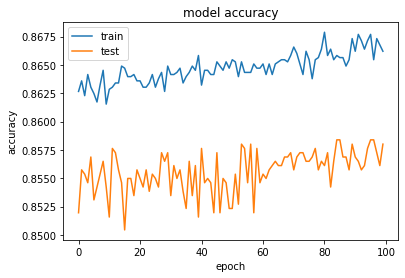

In [49]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

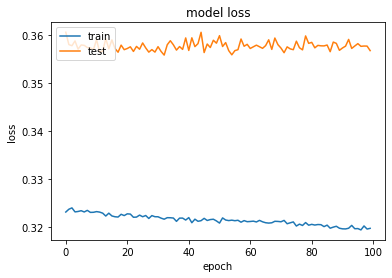

In [50]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()